In [42]:
import matplotlib.pyplot as plt
import numpy as np
import cv2


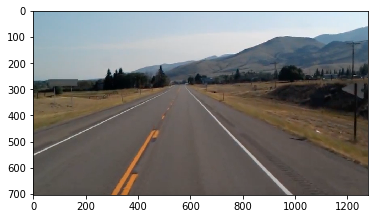

In [44]:
img=cv2.imread("road.png")
img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

In [45]:
print(img.shape)
height=img.shape[0]
width= img.shape[1]
region_of_interest_vertices=[
    (0, height), (width/2, height/2), (width, height)
]

(704, 1279, 3)


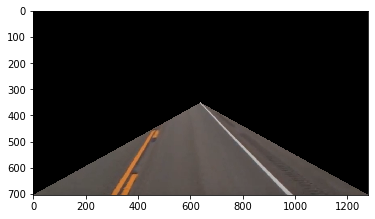

In [46]:
def region_of_interest(img, vertices):
    mask= np.zeros_like(img)
    channel_count=img.shape[2]
    match_mask_color=(255,)*channel_count
    cv2.fillPoly(mask, vertices, match_mask_color)
    maske_image=cv2.bitwise_and(img, mask)
    return maske_image

cropped_image= region_of_interest(img, np.array([region_of_interest_vertices], np.int32))


plt.imshow(cropped_image)
plt.show()

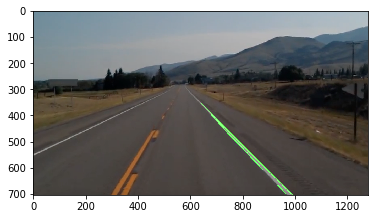

In [52]:
def region_of_interest(img, vertices):
    mask= np.zeros_like(img)
    #channel_count=img.shape[2]
    match_mask_color=255
    cv2.fillPoly(mask, vertices, match_mask_color)
    maske_image=cv2.bitwise_and(img, mask)
    return maske_image

def draw_the_lines(img, lines):
    img=np.copy(img)
    line_image=np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(line_image, (x1,y1), (x2,y2), (0,255,0),thickness=3)

    img=cv2.addWeighted(img, 0.8,line_image, 1,0.0)
    return img

#img=cv2.imread('road.jpeg')
gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny_image= cv2.Canny(gray, 100,200)
cropped_image= region_of_interest(canny_image, np.array([region_of_interest_vertices], np.int32),)

lines=cv2.HoughLinesP(cropped_image, rho=6, theta=np.pi/60, threshold= 150, lines=np.array([]), minLineLength=20, maxLineGap=30)

image_with_lines=draw_the_lines(img, lines)

plt.imshow(image_with_lines)
plt.show()